In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
import tensorflow as tf  
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, BatchNormalization, Embedding  
from keras.layers import LeakyReLU
# from keras.layers.advanced_activations import LeakyReLU  
from keras.layers import ELU, PReLU, LeakyReLU
from tensorflow.keras.layers import concatenate 
from keras.models import Sequential, Model  
from keras.optimizers import Adam  
from keras.utils import to_categorical  
# from keras.layers.advanced_activations import LeakyReLU  
from keras.utils.vis_utils import plot_model  
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder  
import scipy.stats  
import datetime as dt  
import pydot  
import warnings  
warnings.filterwarnings("ignore")  
%matplotlib inline  

encoder = LabelEncoder()

import tensorflow.compat.v1.keras.backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()


In [3]:
! pip install preprocessing 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 349 kB 7.6 MB/s 
     |████████████████████████████████| 1.4 MB 46.6 MB/s 
     |████████████████████████████████| 1.2 MB 36.9 MB/s 
  Created wheel for nltk: filename=nltk-3.2.4-py3-none-any.whl size=1367721 sha256=abb58eed56d18dd3b85612c9f34c1af70ebbf0e0a2a6e3a17d13a6cf7fb682a5
  Stored in directory: /root/.cache/pip/wheels/90/5e/9e/4cb46185f2a16c60e6fc524372ba7fef89ce3347734c8798b6
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7


In [4]:
df = pd.read_csv('/content/drive/MyDrive/파이널/data/real_final_data_for_modeling.csv')

In [5]:
df = df.rename(columns={'유보액/납입자본비율':'유보액'})
df = df.rename(columns={' 수익성':'수익성'})
df = df.rename(columns={' 당기순이익(손실)':'당기순이익'})

df.columns

Index(['Stock', '총자산증가율', '자기자본증가율', '매출액증가율', '총자본영업이익율', '총자본순이익율',
       '자본금순이익율', '매출액순이익율', '매출액영업이익율', '자기자본비율', '부채비율', '유보액', '총자본회전율',
       '자기자본회전율', '당기순이익', '영업활동으로인한현금흐름', '성장성', '안정성', '활동성', '수익성', '현금흐름',
       'Z_score', '부실기업판별_Z_score', '부도확률_O_score', 'F_score', 'K_score',
       '부실기업판별_K_score', '자본잠식', '벌금', '불성실공시', '소송', '영업정지', '특허', '투자주의환기종목',
       '업종', '관리종목여부', '관리종목요건_감사의견', '관리종목요건_매출액', '관리종목요건_영업손실',
       '관리종목요건_법인세비용차감전계속사업손실', '날짜', 'PER', 'PBR', 'EPS', 'DIV', 'EPS성장률'],
      dtype='object')

In [6]:
# 카테고리컬인 애들은 다 astype으로 미리 바꿔주자 >> 다 int64임 
df[['성장성', '안정성', '활동성','수익성', '현금흐름','부실기업판별_Z_score','F_score','부실기업판별_K_score', '자본잠식', '벌금', '불성실공시', '소송', '영업정지', '특허',
       '투자주의환기종목', '업종','관리종목요건_감사의견', '관리종목요건_매출액', '관리종목요건_영업손실', '관리종목요건_법인세비용차감전계속사업손실']] = df[['성장성', '안정성', '활동성','수익성', '현금흐름','부실기업판별_Z_score','F_score','부실기업판별_K_score', '자본잠식', '벌금', '불성실공시', '소송', '영업정지', '특허',
       '투자주의환기종목', '업종','관리종목요건_감사의견', '관리종목요건_매출액', '관리종목요건_영업손실', '관리종목요건_법인세비용차감전계속사업손실']].astype('int64')
df['관리종목여부'] = df['관리종목여부'].astype('int64') 


In [117]:
globals()['numcat_list']

['Stock',
 '총자산증가율',
 '자기자본증가율',
 '매출액증가율',
 '총자본영업이익율',
 '총자본순이익율',
 '자본금순이익율',
 '매출액순이익율',
 '매출액영업이익율',
 '자기자본비율',
 '부채비율',
 '유보액',
 '총자본회전율',
 '자기자본회전율',
 '당기순이익',
 '영업활동으로인한현금흐름',
 '성장성',
 '안정성',
 '활동성',
 '수익성',
 '현금흐름',
 'Z_score',
 '부실기업판별_Z_score',
 '부도확률_O_score',
 'F_score',
 'K_score',
 '부실기업판별_K_score',
 '자본잠식',
 '벌금',
 '불성실공시',
 '소송',
 '영업정지',
 '특허',
 '투자주의환기종목',
 '업종',
 '관리종목요건_감사의견',
 '관리종목요건_매출액',
 '관리종목요건_영업손실',
 '관리종목요건_법인세비용차감전계속사업손실',
 '날짜',
 'PER',
 'PBR',
 'EPS',
 'DIV',
 'EPS성장률']

In [105]:
def gan_before(selectioned_flist, *args):
  # 데이터 준비 
  df_minority_data=df.loc[df['관리종목여부'] == 1]   # target == 1인 애들만 
  df_minority_data_withouttv=df_minority_data.loc[:, df_minority_data.columns != '관리종목여부'] # 타겟값을 제외한 전체 녀석들 
  
  # numerical_df , categorical_df 만들어주기  
  numerical_list= []
  categorical_list = []
  globals()['numcat_list'] = [] #나중에 쓰일 곳이 있을것이야 
  for i in selectioned_flist:
    if df_minority_data_withouttv[i].dtypes == 'float64': # numerical 
      numerical_list.append(i)
      numcat_list.append(i)
      globals()['numerical_df'] = df_minority_data_withouttv[numerical_list]  # 수치형만 여기에다 넣어주렴 
    else:    
      categorical_list.append(i)   # categorical // dtypes == 'int64'
      numcat_list.append(i)
      globals()['categorical_df'] = df_minority_data_withouttv[categorical_list]

  # 수치형 만들어주기 
  globals()['generator_input_list']= []
  for i in globals()['numerical_df'].columns:
    # a = [col for col in numerical_df.columns if numerical_df[i] in col] 
    #i_numerical = numerical_df[i_col] 
    globals()[f'{i}_numerical'] = pd.DataFrame(numerical_df[i]) 
    generator_input_list.append(eval(f'{i}_numerical.shape[1]'))

  # 범주형 만들어주기 
  for i in globals()['categorical_df'].columns:
    # a = [col for col in numerical_df.columns if numerical_df[i] in col] 
    #i_numerical = numerical_df[i_col] 
    globals()[f'{i}_categorical'] = pd.DataFrame(categorical_df[i])
    generator_input_list.append(eval(f'{i}_categorical.shape[1]'))
  # generator_input_list.replace("''"," ")

  # gantrain_input_list 수치형 만들어주기 
  globals()['gantrain_input_list']= []
  for i in globals()['numerical_df'].columns:
    gantrain_input_list.append(eval(f'{i}_numerical.values'))

  # gantrain_input_list 범주형 만들어주기 
  for i in globals()['categorical_df'].columns:
    gantrain_input_list.append(eval(f'{i}_categorical.values'))

  globals()[f'numerical_catsh_list'] = []
  categorical_catsh_list = [] # 확인용  
  globals()['all_catsh_list'] = []
  for i in range(1,len(globals()['numerical_df'].columns)):
    # for a in numerical_df.columns:
    # globals()[f'catsh{i}'] = globals()[f'{a}_numerical'].shape[1]
    globals()[f'numerical_catsh_list'].append(f'catsh{i}')
    all_catsh_list.append(f'catsh{i}')
  # categorical
  for i in range(len(globals()['numerical_catsh_list'])+1,len(globals()['categorical_df'].columns)+1+len(globals()[f'numerical_catsh_list'])+1):    
    # for a in categorical_df.columns:
    # globals()[f'catsh{i}'] = globals()[f'{a}_categorical'].shape[1]
    categorical_catsh_list.append(f'catsh{i}')
    all_catsh_list.append(f'catsh{i}')
  # return len(categorical_df.columns) , len(numerical_df.columns) , numerical_catsh_list , categorical_catsh_list,  all_catsh_list  굿샷 ^^ 
  # EPS성장률_numerical.shape[1]
  return generator_input_list

In [101]:
selectioned_flist = ['Stock', '총자산증가율', '자기자본증가율', '매출액증가율', '총자본영업이익율', '총자본순이익율',
       '자본금순이익율', '매출액순이익율', '매출액영업이익율', '자기자본비율', '부채비율', '유보액', '총자본회전율',
       '자기자본회전율', '당기순이익', '영업활동으로인한현금흐름', '성장성', '안정성', '활동성', '수익성',
       '현금흐름', 'Z_score', '부실기업판별_Z_score', '부도확률_O_score', 'F_score',
       'K_score', '부실기업판별_K_score', '자본잠식', '벌금', '불성실공시', '소송', '영업정지', '특허',
       '투자주의환기종목', '업종', '관리종목요건_감사의견', '관리종목요건_매출액', '관리종목요건_영업손실',
       '관리종목요건_법인세비용차감전계속사업손실', '날짜', 'PER', 'PBR', 'EPS', 'DIV', 'EPS성장률']


In [176]:
gan_before(selectioned_flist)

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [102]:
def gan_generator(*args): 
    # numerical hidden 
    for i in range( 1, len(globals()['numerical_df'].columns)+1):  # numerical 안막을거면 +2 해줘야 함! 
      if i == 1:
        noise = Input(shape = (5000 ,))     # 관리종목여부 ==0인 기업이 5000개이므로 4884개의 가상 데이터 생성 ㄱㄱ (1:1 비율로!) / try2: 3902
        globals()[f'hidden_{i}'] = Dense(8, kernel_initializer = "he_uniform")(noise)    
        globals()[f'hidden_{i}'] = LeakyReLU(0.2)(globals()[f'hidden_{i}'])    
        globals()[f'hidden_{i}'] = BatchNormalization(momentum = 0.8)(globals()[f'hidden_{i}'])
      else: 
        globals()[f'hidden_{i}'] = Dense(8, kernel_initializer = "he_uniform")(globals()[f'hidden_{i-1}'])    
        globals()[f'hidden_{i}'] = LeakyReLU(0.2)(globals()[f'hidden_{i}'])    
        globals()[f'hidden_{i}'] = BatchNormalization(momentum = 0.8)(globals()[f'hidden_{i}'])
    # categorical hidden 
    for i in range(len(globals()['numerical_df'].columns)+1, len(globals()['categorical_df'].columns)+1+len(globals()['numerical_df'].columns)):  
      
      globals()[f'hidden_{i}'] = Dense(8, kernel_initializer = "he_uniform")(globals()[f'hidden_{i-1}'])    
      globals()[f'hidden_{i}'] = LeakyReLU(0.2)(globals()[f'hidden_{i}'])    
      globals()[f'hidden_{i}'] = BatchNormalization(momentum = 0.8)(globals()[f'hidden_{i}'])
    # ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
    # numerical branch
    for i in range(1, len(globals()['numerical_df'].columns)+1):

      globals()[f'branch_{i}'] = Dense(32, kernel_initializer = "he_uniform")(globals()[f'hidden_{i}'])    
      globals()[f'branch_{i}'] = LeakyReLU(0.2)(globals()[f'branch_{i}'])    
      globals()[f'branch_{i}'] = BatchNormalization(momentum = 0.8)(globals()[f'branch_{i}'])    
      globals()[f'branch_{i}'] = Dense(64, kernel_initializer = "he_uniform")(globals()[f'branch_{i}'])    
      globals()[f'branch_{i}'] = LeakyReLU(0.2)(globals()[f'branch_{i}'])    
      globals()[f'branch_{i}'] = BatchNormalization(momentum=0.8)(globals()[f'branch_{i}']) 
  
    # categorical branch
    for i in range(len(globals()['numerical_df'].columns)+1, len(globals()['categorical_df'].columns)+1+len(globals()['numerical_df'].columns)):  # 주의! 피쳐수 바뀌면 다시 설정해줘야해!!  

      globals()[f'branch_{i}'] = Dense(32, kernel_initializer = "he_uniform")(globals()[f'hidden_{i}'])    
      globals()[f'branch_{i}'] = LeakyReLU(0.2)(globals()[f'branch_{i}'])    
      globals()[f'branch_{i}'] = BatchNormalization(momentum = 0.8)(globals()[f'branch_{i}'])    
      globals()[f'branch_{i}'] = Dense(64, kernel_initializer = "he_uniform")(globals()[f'branch_{i}'])    
      globals()[f'branch_{i}'] = LeakyReLU(0.2)(globals()[f'branch_{i}'])    
      globals()[f'branch_{i}'] = BatchNormalization(momentum=0.8)(globals()[f'branch_{i}'])
    # ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
    # numerical
    for i in range(1,len(globals()['numerical_df'].columns)+1):
      for a in globals()['numerical_df'].columns:
        globals()[f'catsh{i}'] = globals()[f'{a}_numerical'].shape[1]
    # categorical
    for i in range(len(globals()['numerical_df'].columns)+1,len(globals()['categorical_df'].columns)+1+len(globals()['numerical_df'].columns)): # 주의! 피쳐수 바뀌면 다시 설정해줘야해!! 참고로 시작값을 뒤에 한 번 더 더해줘야해   
      for a in globals()['categorical_df'].columns:
        globals()[f'catsh{i}'] = globals()[f'{a}_categorical'].shape[1]
    # ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
    # numerical
    all_branchoutput_list = []
    numerical_branchoutput_list = [] # 확인용 
    for i in range(1, len(globals()['numerical_df'].columns)+1):
      globals()[f'branch_{i}_output'] = Dense(globals()[f'catsh{i}'], activation = "swish")(globals()[f'branch_{i}'])   # globals()[f'catsh{i}']  / globals()[f'branch_{i}'] # softmax
      numerical_branchoutput_list.append(f'branch_{i}_output')
      all_branchoutput_list.append(f'branch_{i}_output')
    # categorical
    categorical_branchoutput_list = [] # 확인용  
    for i in range(len(globals()['numerical_df'].columns)+1, len(globals()['categorical_df'].columns)+1+len(globals()['numerical_df'].columns)):
      globals()[f'branch_{i}_output'] = Dense(globals()[f'catsh{i}'],activation = "hard_sigmoid" )(globals()[f'branch_{i}'])   # globals()[f'catsh{i}']  / globals()[f'branch_{i}'] # softmax // 
      categorical_branchoutput_list.append(f'branch_{i}_output')
      all_branchoutput_list.append(f'branch_{i}_output')
    # return numerical_branchoutput_list , categorical_branchoutput_list , all_branchoutput_list 
    # ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
    # combined_output = concatenate([branch_1_output, branch_2_output, branch_3_output,branch_4_output,branch_5_output,branch_6_output,branch_7_output,branch_8_output,branch_9_output,branch_10_output,branch_11_output,branch_12_output,branch_13_output])
    combined_output = branch_1_output
    for i in range(2,len(all_branchoutput_list)+1):
      combined_output = concatenate([combined_output,globals()[f'branch_{i}_output']])  # 
    return  Model(inputs = noise, outputs = combined_output) 

In [178]:
generator = gan_generator(1,  1,  1,  1,  1,  1,  1,  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1)
generator.summary()

Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_21 (InputLayer)          [(None, 5000)]       0           []                               
                                                                                                  
 dense_2345 (Dense)             (None, 8)            40008       ['input_21[0][0]']               
                                                                                                  
 leaky_re_lu_1808 (LeakyReLU)   (None, 8)            0           ['dense_2345[0][0]']             
                                                                                                  
 batch_normalization_1787 (Batc  (None, 8)           32          ['leaky_re_lu_1808[0][0]']       
 hNormalization)                                                                           

In [ ]:
globals()['generator_input_list']

In [88]:
def gan_discriminator(inputs_n):
  #Input from generator
  d_input = Input(shape = (inputs_n,))    
  d = Dense(128, kernel_initializer="he_uniform")(d_input)  
  d = LeakyReLU(0.2)(d)  
  d = Dense(64, kernel_initializer="he_uniform")(d)  
  d = LeakyReLU(0.2)(d)  
  # d = Dense(64, kernel_initializer="he_uniform")(d)  
  # d = LeakyReLU(0.2)(d) 
  d = Dense(32, kernel_initializer="he_uniform")(d)  
  d = LeakyReLU(0.2)(d)  
  d = Dense(16, kernel_initializer="he_uniform")(d)  
  d = LeakyReLU(0.2)(d)  
  d = Dense(8, kernel_initializer="he_uniform")(d)  
  d = LeakyReLU(0.2)(d)  

  #Output Layer
  d_output = Dense(1, activation = "sigmoid")(d) # 이게 원래 sigmoid였는데 그래선 안된대!! >> softmax로 변경!   

  #compile and return model
  model = Model(inputs = d_input, outputs = d_output)  
  model.compile(loss = "binary_crossentropy", optimizer = Adam(lr=0.0002, beta_1=0.5))  # try1. binary_crossentropy 2. categorical_crossentropy   //  // mse 
  return model 


inputs_n =  sum(globals()['generator_input_list'])

discriminator = gan_discriminator(inputs_n)  
discriminator.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 45)]              0         
                                                                 
 dense_2056 (Dense)          (None, 128)               5888      
                                                                 
 leaky_re_lu_1565 (LeakyReLU  (None, 128)              0         
 )                                                               
                                                                 
 dense_2057 (Dense)          (None, 64)                8256      
                                                                 
 leaky_re_lu_1566 (LeakyReLU  (None, 64)               0         
 )                                                               
                                                                 
 dense_2058 (Dense)          (None, 32)                208

In [89]:
def define_complete_gan(generator, discriminator):  
  # discriminator.trainable = True     >>              trainable를 true하면 뭐가좋을까??  알아볼 것! 와우 무조건 True해야해 이거하고 첨부터 0.00x 이러던애가 1.9부터 시작함 >> 근데 이제 생성자가 비실하네..? ^^;
  # discriminator.train_on_batch(X, y_dis)
  gan_output = discriminator(generator.output)  
  #Initialize gan
  model = Model(inputs = generator.input, outputs = gan_output)  
  #Model Compilation
  model.compile(loss = "binary_crossentropy", optimizer = Adam(lr=0.0002, beta_1=0.5))   # binary_crossentropy , mse
  discriminator.trainable = True # 학습 막고 싶으면 false
  return model  

completegan = define_complete_gan(generator, discriminator)  

In [232]:
catsh1[0]

1

In [249]:
EPS성장률_numerical.shape[1]   # >> 이게 catsh잖아 

1

In [248]:
 iaa = np.random.randint(0, globals()['catsh1'], int(63 / 2)  )  # .shape[0] 

# globals()['catsh1'][iaa]
# catsh1[iaa]
len(iaa) # 31개? 
iaa

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [260]:
EPS성장률_numerical.values.shape
rres[0][iaa]

array([[159.99],
       [159.99],
       [159.99],
       [159.99],
       [159.99],
       [159.99],
       [159.99],
       [159.99],
       [159.99],
       [159.99],
       [159.99],
       [159.99],
       [159.99],
       [159.99],
       [159.99],
       [159.99],
       [159.99],
       [159.99],
       [159.99],
       [159.99],
       [159.99],
       [159.99],
       [159.99],
       [159.99],
       [159.99],
       [159.99],
       [159.99],
       [159.99],
       [159.99],
       [159.99],
       [159.99]])

In [264]:
def gan_train(gan, generator , discriminator,latent_dim, n_epochs, n_batch,n_eval,*args ): # *args >> catsh자리
  half_batch = int(n_batch / 2)  
  discriminator_loss = []  
  generator_loss = []  
  valid = np.ones((half_batch, 1))  
  y_gan = np.ones((n_batch,1)) 
  fake = np.zeros((half_batch, 1))  
  n_epochs = 7000 # 수정하렴! 
  for i in range(n_epochs):  
    #select random batch from real categorical and numerical data
    idx = np.random.randint(0, 116 , half_batch) # args[0].shape[0] >> 116개 
    for i in globals()['numcat_list']:
      for a in args:
        for k in (len(args)):
        # for a in globals()['all_catsh_list']:
          globals()[f'{i}_real'] = a[k][idx]   #    eval(globals()['all_catsh_list'])
          real_data = np.concatenate([real_data , globals()[f'{i}_real']], axis = 1) 

  noise = np.random.normal(0, 1, (half_batch, latent_dim))  
  fake_data = generator.predict(noise)  

  #train the discriminator and return losses and acc
  d_loss_real =  da_real = discriminator.train_on_batch(real_data, valid)  # 요기 수수께끼 
  d_loss_fake = da_fake = discriminator.train_on_batch(fake_data, fake)   # 요기 수수께끼 
  d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)   # 요기 수수께끼 
  discriminator_loss.append(d_loss)    # 요기 수수께끼  
  
  #generate noise for generator input and train the generator (to have the discriminator label samples as valid)
  noise = np.random.normal(0, 1, (n_batch, latent_dim))  
  g_loss = gan.train_on_batch(noise, y_gan)  
  generator_loss.append(g_loss)  

  # for i in args:
  #   for k in i:
  #     np.array(k)
  # for i in globals()['gantrain_input_list']:
  # for k in i:
  #   print(np.array(k))

      #evaluate progress
  if (i+1) % n_eval == 0:  
      print ("Epoch: %d [Discriminator loss: %f] [Generator loss: %f]" % (i + 1, d_loss, g_loss ))  
        
  plt.figure(figsize = (20, 10))  
  plt.plot(generator_loss, label = "Generator loss")  
  plt.plot(discriminator_loss, label = "Discriminator loss")     
  plt.title("Stats from training GAN")  
  plt.grid()  
  plt.legend()   

In [195]:
def return_values_str(gan_train_input_list):
  for num, val in enumerate(gan_train_input_list):
    globals()[f'gan_values_{num}'] = val
    return globals()[f'gan_values_{num}']

In [214]:
def return_values_str(gan_train_input_list):
  res = ''
  for num, val in enumerate(gan_train_input_list):
    globals()[f'gan_values_{num+1}'] = val
    res += f', globals()["gan_values_{num+1}"]'
  
  res = res[2:]
  return eval(res)

rres = return_values_str(globals()['gantrain_input_list'])

In [226]:
def return_values_str(gan_train_input_list):
  res = ''
  for num, val in enumerate(gan_train_input_list):
    globals()[f'gan_values_{num+1}'] = val
    res += f', globals()["gan_values_{num+1}"]'
  
  res = res[2:]
  return eval(res)

rres = return_values_str(globals()['gantrain_input_list'])

In [263]:
for a in rres:
  print(a)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 [ 4.08000e+00]
 [ 5.71600e+01]
 [ 1.93900e+01]
 [-2.44000e+00]
 [ 2.59100e+01]
 [ 1.44900e+01]
 [ 3.84620e+02]
 [ 4.98000e+00]
 [ 7.10000e+00]
 [ 2.56000e+01]
 [ 6.70000e+00]
 [ 9.99400e+01]]
[[ 2.28700e+01]
 [-1.25400e+01]
 [-3.94500e+01]
 [-2.75300e+01]
 [ 1.45500e+01]
 [ 2.48700e+01]
 [-9.85000e+00]
 [-1.16700e+01]
 [ 1.52590e+02]
 [ 8.20000e+00]
 [-5.71000e+00]
 [ 3.76500e+01]
 [-1.94700e+01]
 [-1.16000e+00]
 [ 8.81900e+01]
 [ 3.65000e+01]
 [ 1.72000e+00]
 [-1.51100e+01]
 [-1.10800e+01]
 [ 9.60800e+01]
 [-2.98100e+01]
 [ 2.75500e+01]
 [ 4.57000e+00]
 [ 7.08000e+00]
 [ 9.70600e+01]
 [-1.31600e+01]
 [-1.11000e+01]
 [ 2.11000e+01]
 [ 3.17000e+01]
 [-1.58600e+01]
 [-3.71500e+01]
 [ 1.02000e+00]
 [-4.44000e+00]
 [-8.42000e+00]
 [-2.93000e+01]
 [ 2.99890e+02]
 [-8.80000e+00]
 [-3.23200e+01]
 [ 1.58600e+01]
 [-1.09900e+01]
 [ 4.89310e+02]
 [ 2.24850e+02]
 [ 3.18680e+02]
 [ 2.29100e+01]
 [-5.81000e+00]
 [-5.75300e+01]
 [-7.20000e+00]
 [ 8.40000e+00]
 [ 

In [265]:
# gan_train(gan, generator , discriminator,latent_dim, n_epochs, n_batch,n_eval,*args )
latent_dim = 5000
gan_train(completegan, generator, discriminator, latent_dim,
          7000,
           63
          , 200
          , rres
          )
          # numerical_df_rescaled, 


TypeError: ignored

In [221]:
return_values_str(globals()['gantrain_input_list'])

'globals()["gan_values_1"], globals()["gan_values_2"], globals()["gan_values_3"], globals()["gan_values_4"], globals()["gan_values_5"], globals()["gan_values_6"], globals()["gan_values_7"], globals()["gan_values_8"], globals()["gan_values_9"], globals()["gan_values_10"], globals()["gan_values_11"], globals()["gan_values_12"], globals()["gan_values_13"], globals()["gan_values_14"], globals()["gan_values_15"], globals()["gan_values_16"], globals()["gan_values_17"], globals()["gan_values_18"], globals()["gan_values_19"], globals()["gan_values_20"], globals()["gan_values_21"], globals()["gan_values_22"], globals()["gan_values_23"], globals()["gan_values_24"], globals()["gan_values_25"], globals()["gan_values_26"], globals()["gan_values_27"], globals()["gan_values_28"], globals()["gan_values_29"], globals()["gan_values_30"], globals()["gan_values_31"], globals()["gan_values_32"], globals()["gan_values_33"], globals()["gan_values_34"], globals()["gan_values_35"], globals()["gan_values_36"], 

In [197]:
globals()['gantrain_input_list']

[array([[159.99],
        [-20.23],
        [-28.64],
        [-55.59],
        [ -5.56],
        [ -5.06],
        [-28.88],
        [-17.71],
        [ -0.96],
        [124.55],
        [-12.27],
        [-18.3 ],
        [-24.1 ],
        [-18.25],
        [  6.49],
        [  4.28],
        [173.73],
        [  4.04],
        [-12.2 ],
        [ 12.77],
        [-12.94],
        [  5.9 ],
        [ 13.47],
        [ 84.66],
        [-18.86],
        [ 26.97],
        [-20.39],
        [ -1.24],
        [ 27.53],
        [ -1.68],
        [-49.11],
        [  0.98],
        [  0.49],
        [-25.55],
        [-33.41],
        [-12.67],
        [ -5.07],
        [-65.93],
        [ 16.89],
        [-27.63],
        [  4.62],
        [-10.85],
        [-25.07],
        [-39.03],
        [ 17.06],
        [ -0.63],
        [  1.48],
        [  5.81],
        [ 10.84],
        [ -3.34],
        [-18.5 ],
        [ -8.99],
        [ 40.21],
        [  5.76],
        [ 47.52],
        [1

In [189]:
def df():


  return 


AttributeError: ignored

원본`

In [ ]:
def gan_train(gan, generator, discriminator, catsh1,catsh2,catsh3,catsh4,catsh5,catsh6,catsh7,catsh8,catsh9,catsh10,catsh11,catsh12, catsh13, latent_dim, n_epochs, n_batch,n_eval):  # ,numerical
#, catsh14, catsh15, catsh16, catsh17, catsh18, catsh19, catsh20,catsh21, catsh22,catsh23, catsh24, catsh25, catsh26, catsh27,catsh28 , 
    #Upddte Discriminator with half batch size
    half_batch = int(n_batch / 2)  
    discriminator_loss = []  
    generator_loss = []  
    #generate class labels for fake and real
    valid = np.ones((half_batch, 1))  
    y_gan = np.ones((n_batch,1))   #, 1  
    # # Generator를 학습시킵니다.
    # noise = np.random.normal(0, 1, size=[batch_size, random_dim])
    # y_gen = np.ones(batch_size)
    fake = np.zeros((half_batch, 1))  
    n_epochs = 7000 # 수정하렴! 
    #training
    for i in range(n_epochs):  
      #select random batch from real categorical and numerical data
      idx = np.random.randint(0, catsh1.shape[0], half_batch)      
      # for i in range(1,len(numerical_df.columns)):
      #   for a in numerical_df.columns:
      #     globals()[f'{a}_real'] = globals()[f'catsh{i}[idx]']
      EPS성장률_real = catsh1[idx]  
      PBR_real = catsh2[idx]  
      K_score_real = catsh3[idx]  
      총자본영업이익율_real = catsh4[idx]  
      매출액증가율_real = catsh5[idx]  
      총자산증가율_real = catsh6[idx]  
      총자본순이익율_real = catsh7[idx]  
      자본잠식_real = catsh8[idx]  
      투자주의환기종목_real = catsh9[idx]  
      부실기업판별_K_score_real = catsh10[idx]  
      관리종목요건_매출액__real = catsh11[idx]  
      소송_real = catsh12[idx]  
      벌금_real = catsh13[idx]  
      # K_score_real = catsh14[idx]  
      # 부실여부판단_K_real = catsh15[idx]  
      # 성장성_real = catsh16[idx]  
      # 수익성_real = catsh17[idx]  
      # 안정성_real = catsh18[idx]  
      # 활동성_real = catsh19[idx]  
      # 현금흐름_real = catsh20[idx]  
      # 불성실공시_real = catsh21[idx]   
      # 벌금_real = catsh22[idx]  
      # 소송_real = catsh23[idx]    
      # 영업정지_real = catsh24[idx]          
      # 특허_real = catsh25[idx]          
      # 자본잠식_real = catsh26[idx]          
      # 투자주의환기종목_real = catsh27[idx]          
      # 업종_real = catsh28[idx]          
      # numerical_real = numerical[idx]

        # numerical_df_rescaled  !!! 이거 numerical로 수정함!!  

        #concatenate categorical and numerical data for the discriminator
      # for i in numerical_df.columns:
        # real_data = np.concatenate([ globals()[f'{i}_real'], numerical_real ], axis = 1)  
      real_data = np.concatenate([EPS성장률_real, PBR_real, K_score_real
                                  ,총자본영업이익율_real,매출액증가율_real,총자산증가율_real,총자본순이익율_real ,자본잠식_real,투자주의환기종목_real, 
                                  부실기업판별_K_score_real,관리종목요건_매출액__real,소송_real,벌금_real
                                  # , K_score_real,부실여부판단_K_real,
                                  # 성장성_real, 수익성_real , 안정성_real , 활동성_real, 현금흐름_real,불성실공시_real,벌금_real
                                  # ,소송_real , 영업정지_real, 특허_real,자본잠식_real, 투자주의환기종목_real,업종_real
                                  # ,numerical_real
                                  ], axis = 1)  

# for i in range(1, len(numerical_df.columns)):
#     combined_output = concatenate([globals()[f'branch_{i}_output'], branch_29_output ])

      #generate fake samples from the noise
      noise = np.random.normal(0, 1, (half_batch, latent_dim))  
      fake_data = generator.predict(noise)  
    
      #train the discriminator and return losses and acc
      d_loss_real =  da_real = discriminator.train_on_batch(real_data, valid)  # 요기 수수께끼 
      d_loss_fake = da_fake = discriminator.train_on_batch(fake_data, fake)   # 요기 수수께끼 
      d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)   # 요기 수수께끼 
      discriminator_loss.append(d_loss)    # 요기 수수께끼  
      
      #generate noise for generator input and train the generator (to have the discriminator label samples as valid)
      noise = np.random.normal(0, 1, (n_batch, latent_dim))  
      g_loss = gan.train_on_batch(noise, y_gan)  
      generator_loss.append(g_loss)  

      #evaluate progress
      if (i+1) % n_eval == 0:  
          print ("Epoch: %d [Discriminator loss: %f] [Generator loss: %f]" % (i + 1, d_loss, g_loss ))  
            
    plt.figure(figsize = (20, 10))  
    plt.plot(generator_loss, label = "Generator loss")  
    plt.plot(discriminator_loss, label = "Discriminator loss")     
    plt.title("Stats from training GAN")  
    plt.grid()  
    plt.legend()  

In [181]:
EPS성장률_numerical.values

array([[-7.75700935e-01],
       [-1.24355301e+00],
       [-1.15454545e+01],
       [ 7.47572816e-01],
       [-7.11262799e-01],
       [-1.37363834e+00],
       [ 6.37837838e-01],
       [-1.20769231e+00],
       [ 7.73693972e-01],
       [-5.93041884e+00],
       [-1.91533948e-01],
       [-1.62878788e+00],
       [-3.86100386e-02],
       [ 1.54000000e+00],
       [-7.21141358e-02],
       [-2.97872340e-02],
       [ 3.12500000e-02],
       [-4.44954128e+00],
       [-7.21141358e-02],
       [-3.54679803e-01],
       [ 1.15789474e-01],
       [ 9.69529086e-02],
       [-8.45730028e-01],
       [-1.07867240e+00],
       [ 1.05384615e+01],
       [-9.67567568e-01],
       [-6.40993789e+00],
       [ 9.51219512e-01],
       [ 0.00000000e+00],
       [-6.22796710e-01],
       [ 4.35754190e+00],
       [ 6.91011236e-01],
       [-1.67656766e+00],
       [ 6.45090000e-01],
       [-8.76543210e-01],
       [ 2.79500000e+02],
       [-4.70394737e+00],
       [-8.02983219e-01],
       [-1.0

In [192]:
latent_dim = 5000
gan_train(completegan, generator, discriminator,
          # K_score_numerical.values, 부실여부판단_K_numerical.values, 성장성_numerical.values , 수익성_numerical.values,안정성_numerical.values,
          # 활동성_numerical.values,현금흐름_numerical.values,불성실공시_numerical.values,벌금_numerical.values,소송_numerical.values, 
          # 영업정지_numerical.values,특허_numerical.values,자본잠식_numerical.values,투자주의환기종목_numerical.values,업종_numerical.values, 
          latent_dim,
          n_epochs = 7000,
          n_batch = 63
          , n_eval = 200
          , return_values_str(globals()['gantrain_input_list'])
          )
          # numerical_df_rescaled, 

SyntaxError: ignored

In [ ]:
globals()[f'{i}_numerical'].values for i in globals()['numerical_df'].columns

In [ ]:
[globals()[f'{i}_numerical'].values for i in globals()['numerical_df'].columns]


In [163]:
def 보영(*args):
  for i in args:
    for k in i:
      print(k)

# ganafterq

EPS성장률 Comparison between Original Data and Generated Data


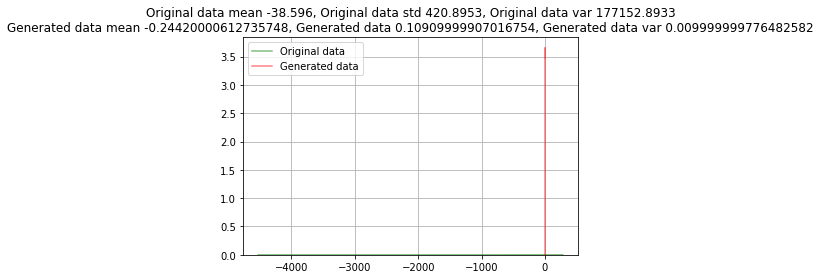

PBR Comparison between Original Data and Generated Data


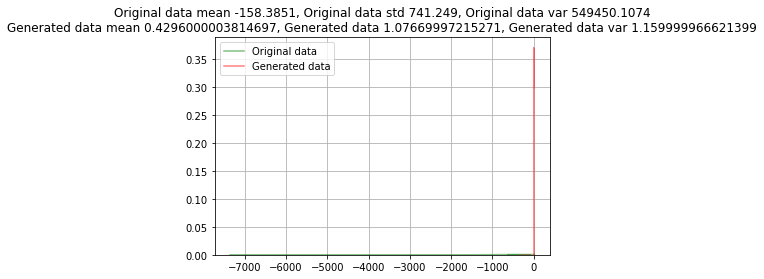

K_score Comparison between Original Data and Generated Data


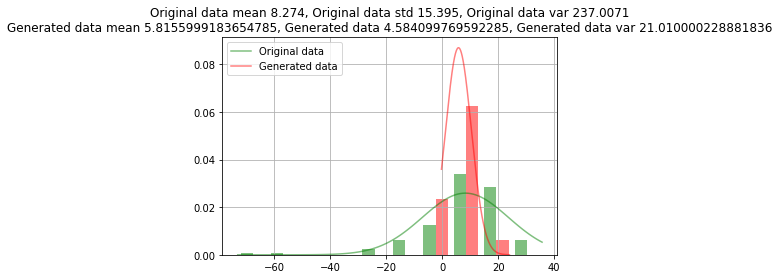

총자본영업이익율 Comparison between Original Data and Generated Data


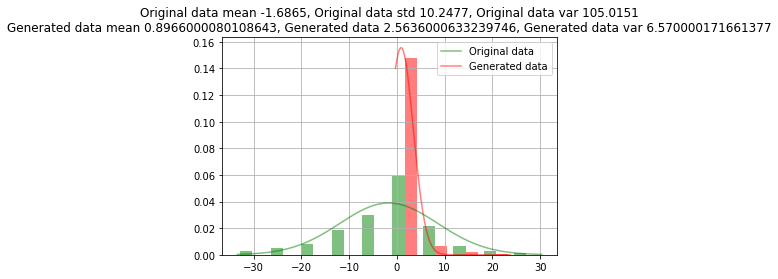

매출액증가율 Comparison between Original Data and Generated Data


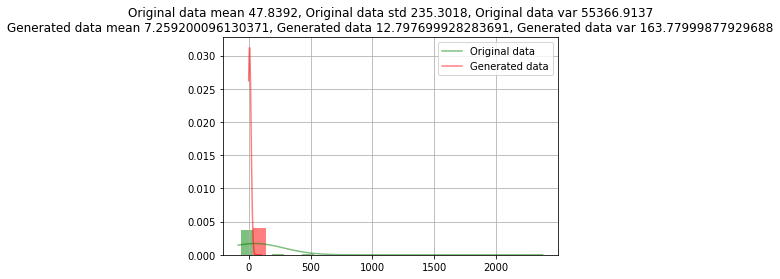

총자산증가율 Comparison between Original Data and Generated Data


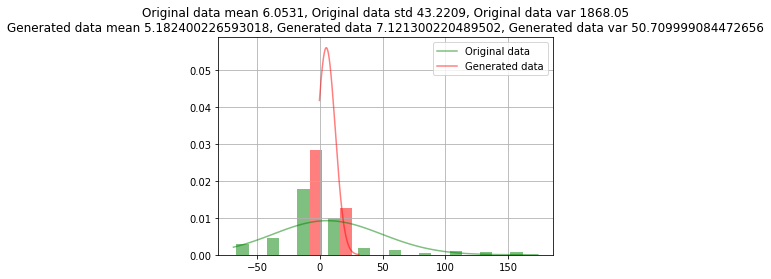

총자본순이익율 Comparison between Original Data and Generated Data


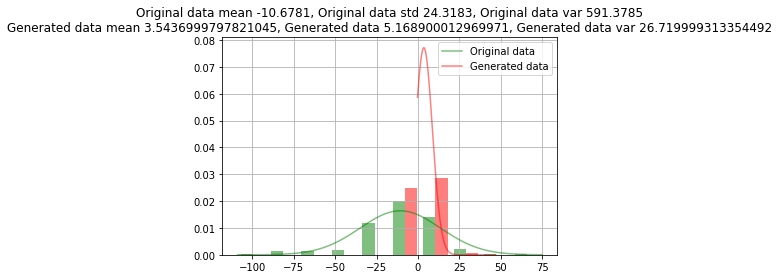

In [ ]:
noise = np.random.normal(0, 1, (4884, 5000))  
generated_mixed_data = generator.predict(noise)  
columns=list(EPS성장률_numerical.columns)+list(PBR_numerical.columns)+list(K_score_numerical.columns) +list(총자본영업이익율_numerical.columns)+list(매출액증가율_numerical.columns) +list(총자산증가율_numerical.columns)+list(총자본순이익율_numerical.columns)+list(자본잠식_categorical.columns)+list(투자주의환기종목_categorical.columns)+list(부실기업판별_K_score_categorical.columns)+list(관리종목요건_매출액_categorical.columns)+list(소송_categorical.columns)  +list(벌금_categorical.columns)
#  +list(K_score_numerical.columns)+list(부실여부판단_K_numerical.columns)+list(성장성_numerical.columns)+list(수익성_numerical.columns)+list(안정성_numerical.columns)+list(활동성_numerical.columns)+list(현금흐름_numerical.columns)+list(불성실공시_numerical.columns)+list(벌금_numerical.columns)+list(소송_numerical.columns)+list(영업정지_numerical.columns)+list(특허_numerical.columns)+list(자본잠식_numerical.columns)+list(투자주의환기종목_numerical.columns)+list(업종_numerical.columns)

mixed_gen_df = pd.DataFrame(data = generated_mixed_data, columns = columns)  
# mixed_gen_df.iloc[:,:-3] = np.round(mixed_gen_df.iloc[:,:-3])  
# mixed_gen_df.iloc[:,-3:] = scaling.inverse_transform(mixed_gen_df.iloc[:,-3:])  

#Original Data
original_df = pd.concat([EPS성장률_numerical,PBR_numerical,K_score_numerical
                       ,총자본영업이익율_numerical,매출액증가율_numerical,총자산증가율_numerical,총자본순이익율_numerical
                       ,자본잠식_categorical,투자주의환기종목_categorical
                         ,부실기업판별_K_score_categorical,관리종목요건_매출액_categorical
                        ,소송_categorical ,벌금_categorical
                        #  ,
                        #  K_score_numerical, 부실여부판단_K_numerical, 성장성_numerical, 수익성_numerical, 안정성_numerical,
                        #  활동성_numerical,현금흐름_numerical,  불성실공시_numerical ,벌금_numerical , 소송_numerical, 영업정지_numerical,특허_numerical, 자본잠식_numerical,
                        # 투자주의환기종목_numerical,업종_numerical
                         ], axis = 1)  
def normal_distribution(org, noise):  
    org_x = np.linspace(org.min(), org.max(), len(org))  
    noise_x = np.linspace(noise.min(), noise.max(), len(noise))  
    org_y = scipy.stats.norm.pdf(org_x, org.mean(), org.std())  
    noise_y = scipy.stats.norm.pdf(noise_x, noise.mean(), noise.std())  
    n, bins, patches = plt.hist([org, noise], density = True, alpha = 0.5, color = ["green", "red"])  
    xmin, xmax = plt.xlim()  
    plt.plot(org_x, org_y, color = "green", label = "Original data", alpha = 0.5)  
    plt.plot(noise_x, noise_y, color = "red", label = "Generated data", alpha = 0.5)  
    title = f"Original data mean {np.round(org.mean(), 4)}, Original data std {np.round(org.std(), 4)}, Original data var {np.round(org.var(), 4)}\nGenerated data mean {np.round(noise.mean(), 4)}, Generated data {np.round(noise.std(), 4)}, Generated data var {np.round(noise.var(), 2)}"
    plt.title(title)  
    plt.legend()  
    plt.grid()  
    plt.show()  

Numeric_columns=numerical_df.columns  

for column in numerical_df.columns:  
    print(column, "Comparison between Original Data and Generated Data")  
    normal_distribution(original_df[column], mixed_gen_df[column])

# for column in categorical_df.columns:  
#   print(column, "Comparison between Original Data and Generated Data")  
#   normal_distribution(original_df[column], mixed_gen_df[column])

In [ ]:
def binary_step(data):
  # for i in range(len(data)): 
    if data<0.5:
      return 0
    else:
      return 1

In [ ]:
def 열일이로나뉘어진거(data):
  # for i in range(len(data)): 
    if data<0.5:
      return 0
    elif 0.5< data < 1.5: 
      return 1 
    elif data > 1.5:
      return 2
    

In [ ]:
# 자동화 포함 ok 
# # categorical 피쳐들 함수로 0과 1로 만들어주기! 

# mixed_gen_df['자본잠식'] = mixed_gen_df['자본잠식'].apply(binary_step)
# mixed_gen_df['투자주의환기종목'] = mixed_gen_df['투자주의환기종목'].apply(binary_step)
# mixed_gen_df['부실기업판별_K_score'] = mixed_gen_df['부실기업판별_K_score'].apply(열일이로나뉘어진거)
# mixed_gen_df['관리종목요건_매출액'] = mixed_gen_df['관리종목요건_매출액'].apply(binary_step)
# mixed_gen_df['소송'] = mixed_gen_df['소송'].apply(binary_step)
# mixed_gen_df['벌금'] = mixed_gen_df['벌금'].apply(binary_step)



In [ ]:
# gan 자동화시킬거에 넣을꺼! (우선 gan돌리고나서!)

def after_gan_eval(model, X_train, X_test, y_train, y_test):
  def binary_step(data):
    # for i in range(len(data)): 
      if data<0.5:
        return 0
      else:
        return 1

  for i in categorical_df.columns:
    mixed_gen_df[f'{i}'] = mixed_gen_df[f'{i}'].apply(binary_step) # 0,1로 다 바꿔주기 
    mixed_gen_df[f'{i}'] = mixed_gen_df[f'{i}'].astype('int64') # type변환 

  # df_generated_data 생성
  ## numerical_data >> generated_data에 넣어주기 
  df_generated_data = pd.DataFrame()   
  for i in numerical_df.columns:
    df_generated_data[f'{i}'] = mixed_gen_df[f'{i}']

  ## categorical_data >> generated_data에 넣어주기 
  for i in categorical_df.columns:
    df_generated_data[f'{i}'] = mixed_gen_df[f'{i}']  
  ## 타겟값 붙여주기 
  df_generated_data['관리종목여부'] = 1
  # 이 다음이 원본데이터에서 모델학습에 쓸 피쳐들 따로 떼서 final_df 만들어주는거 >> 이건 자동화 밖에서 이미 설정해줄거라 포함안시켜도 될 듯 
  
  # 생성된 데이터 X1, y1으로 나뉘어주고 
  y1 = df_generated_data['관리종목여부']
  X1 = df_generated_data.drop(["관리종목여부"], axis=1)

  # 생성된 데이터를 학습(train)데이터에 넣어주기 
  X_train1= pd.concat([X_train , X1 ], axis = 0)
  y_train1 = pd.concat([y_train, y1], axis = 0) 

  skf = StratifiedKFold(n_splits=10, shuffle = True)
  cross_val_score(model, X_train1, y_train1, cv=skf, scoring='accuracy').mean()
  # 학습 
  model.fit(X_train1, y_train1)    #  np.array(y_train1).reshape(y_train1.shape[0],1) 
  pred =  model.predict(X_test) 

  print('Confusion matrix')
  print(confusion_matrix(y_test, pred))
  print(f"Precision : {precision_score(y_test, pred, average='macro'):.4f}")
  print(f"Recall    : {recall_score(y_test, pred, average='macro'):.4f}")
  print(f"F1        : {f1_score(y_test, pred, average='macro'):.4f}")
  print(f"Accuracy  : {accuracy_score(y_test, pred):.4f}")
  
  return 
